# Plotting different traces

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import os

from JUSUFlike.Project.Codes.processing_results import *
from IPython.display import Image
import tvb_model_reference.src.nuu_tools_simulation_human as tools
from sklearn.cluster import KMeans

SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"]})

fig_labels = ['$S$', '$b_e$ (pA)', '$E_{L,i}$ (mV)', '$E_{L,e}$ (mV)', '$T$ (ms)']

/home/master/anaconda3/envs/tvbadexgraph/lib/python3.10/site-packages/tvb/datatypes/surfaces.py:63: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


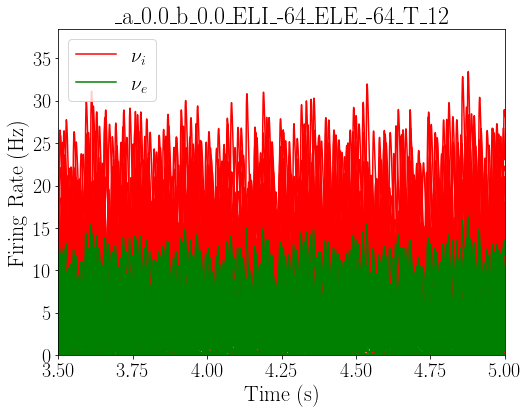

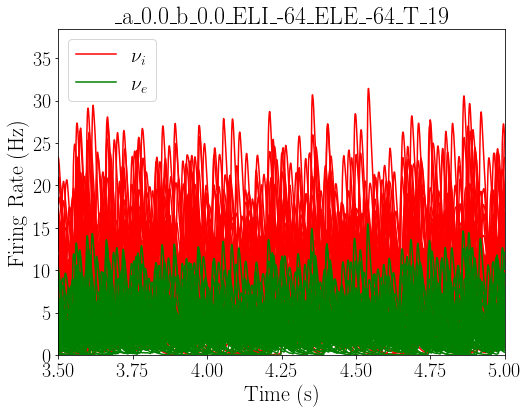

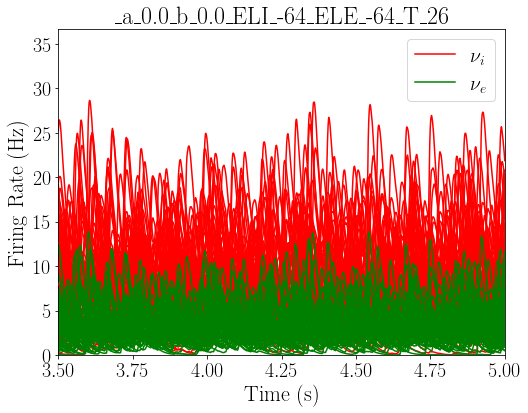

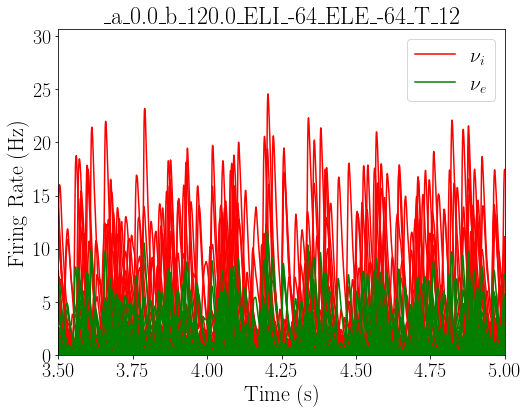

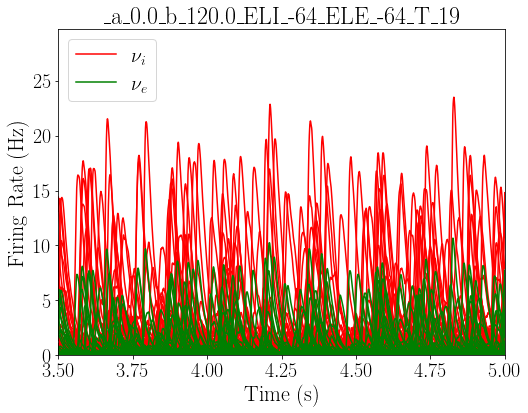

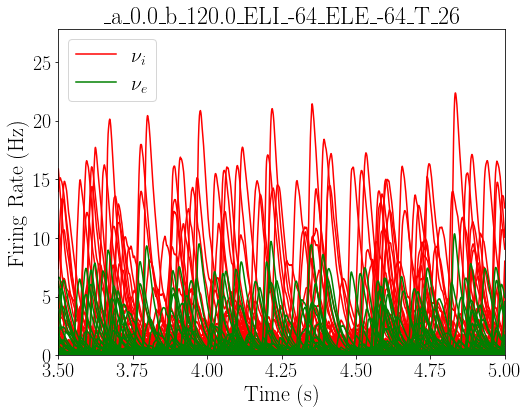

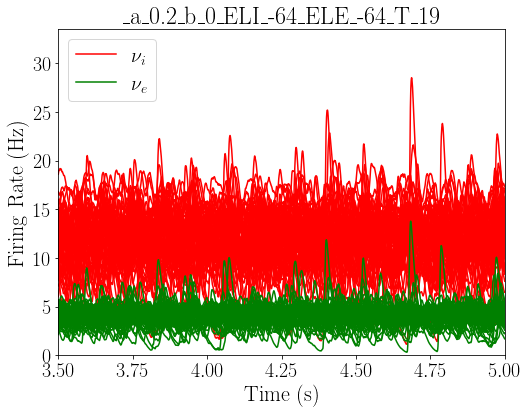

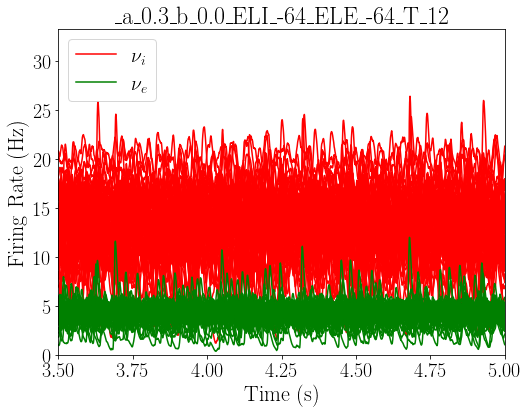

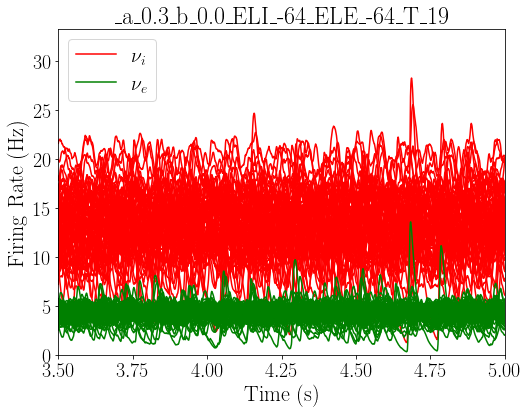

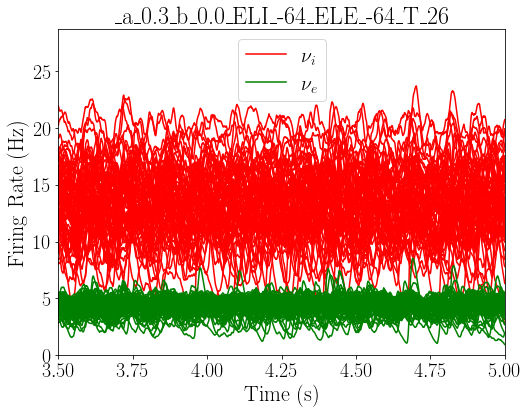

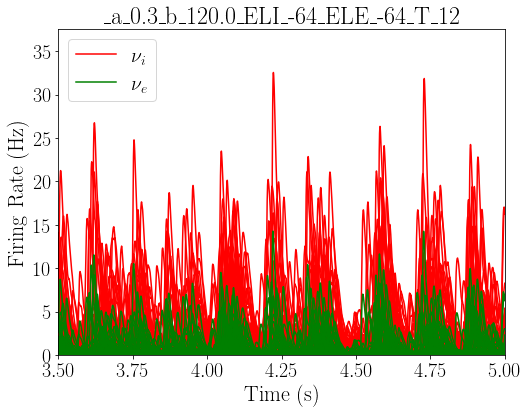

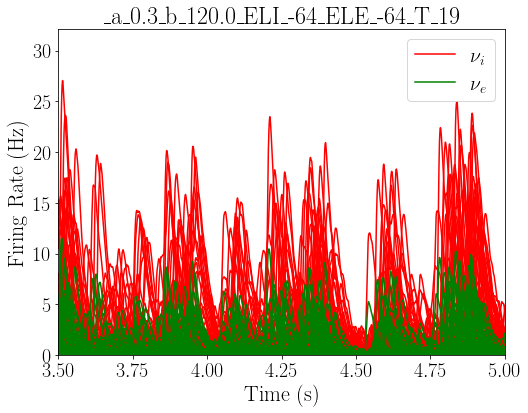

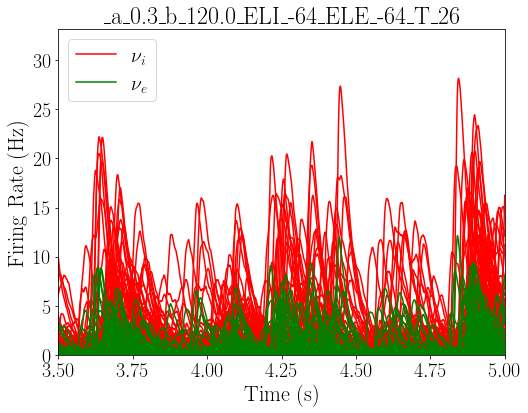

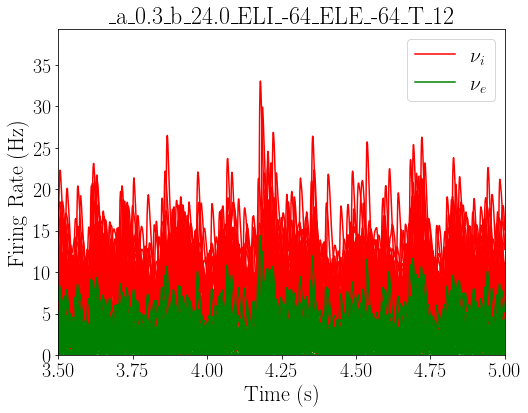

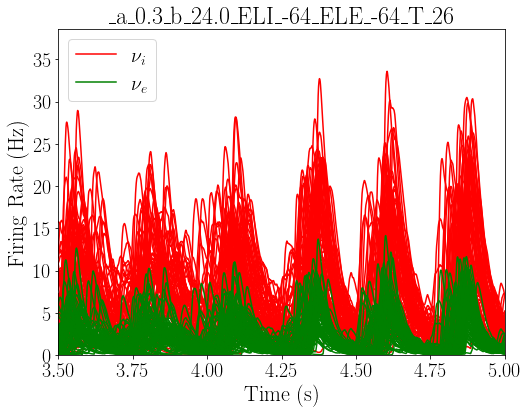

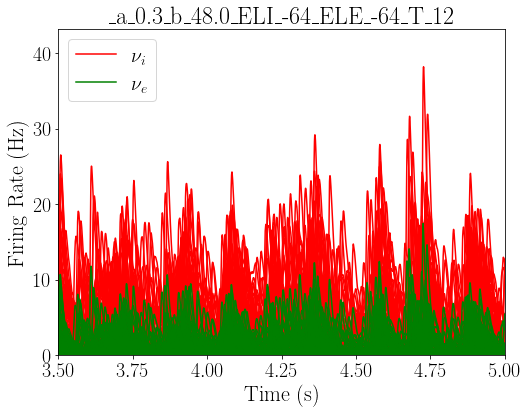

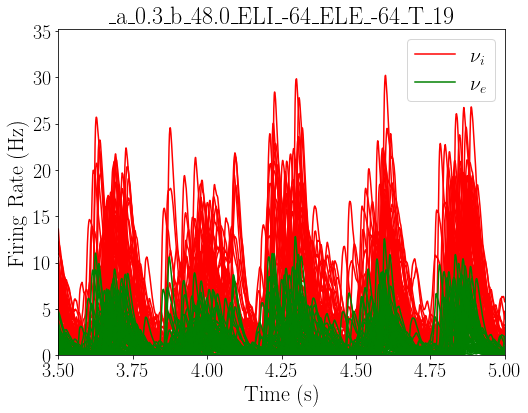

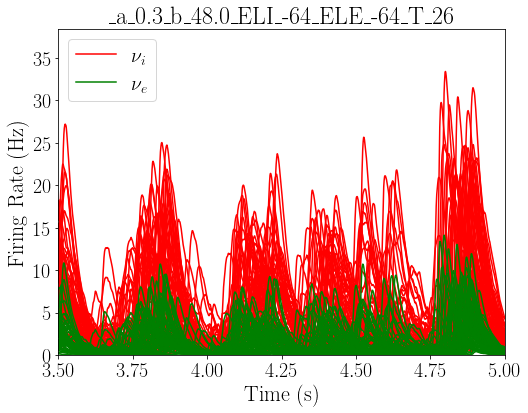

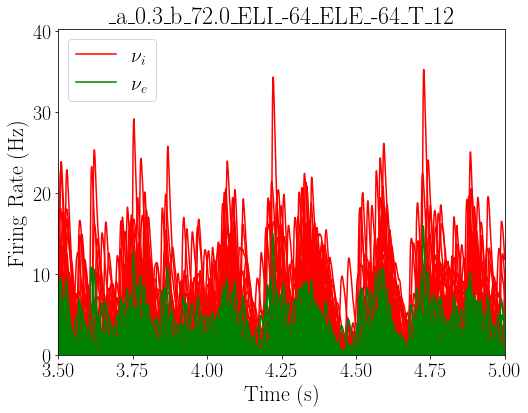

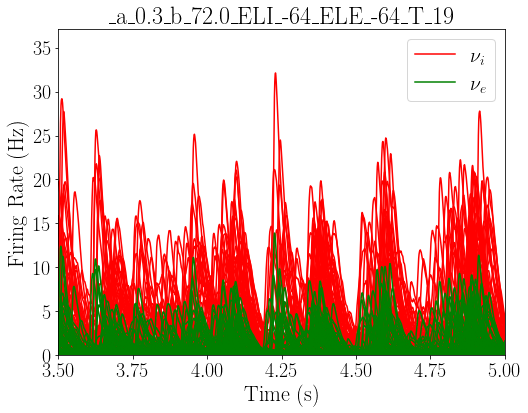

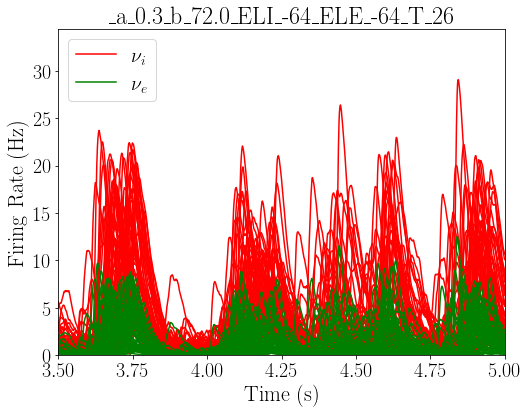

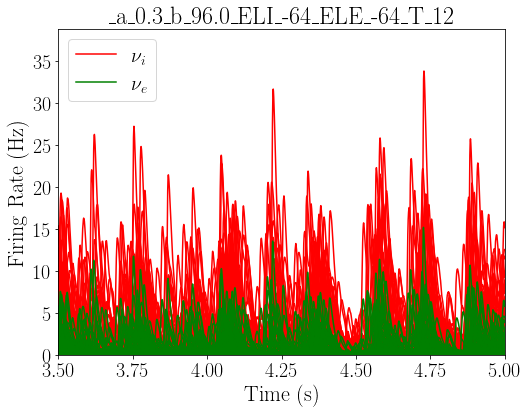

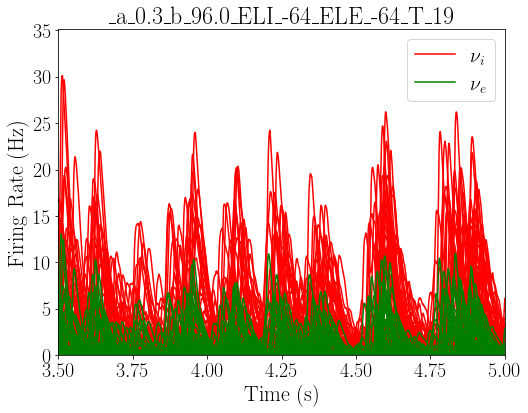

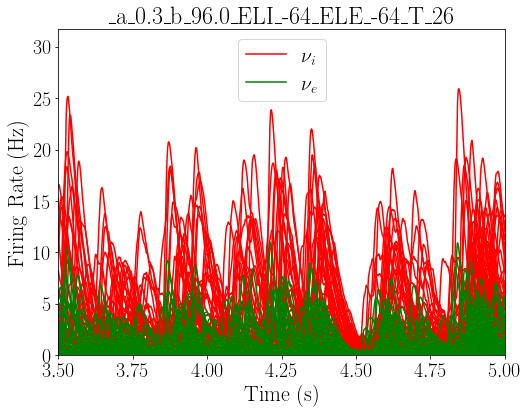

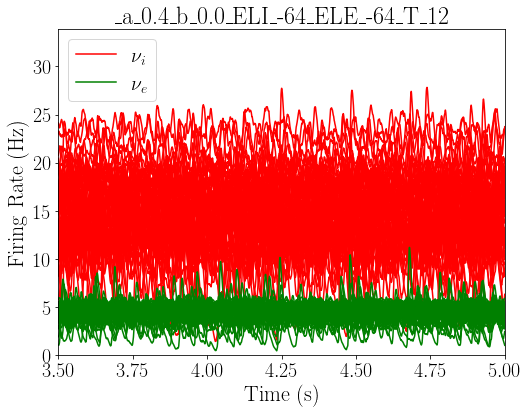

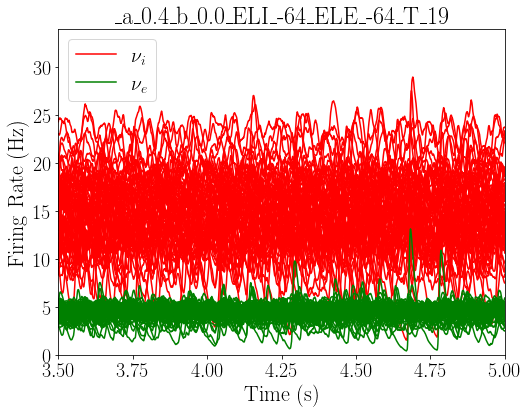

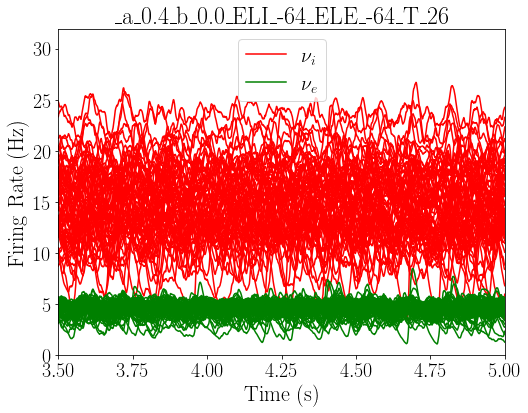

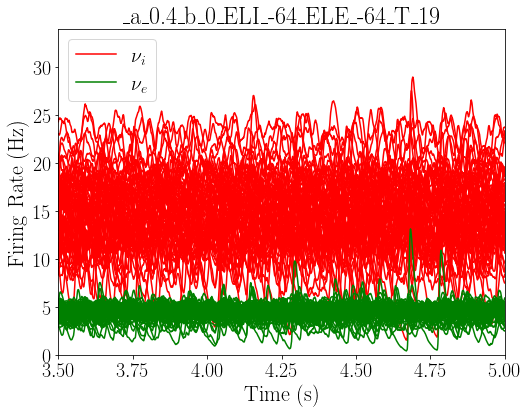

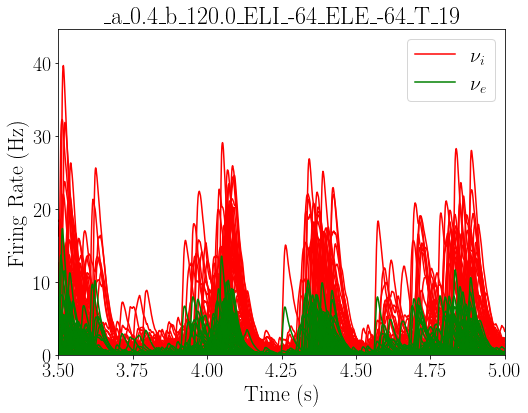

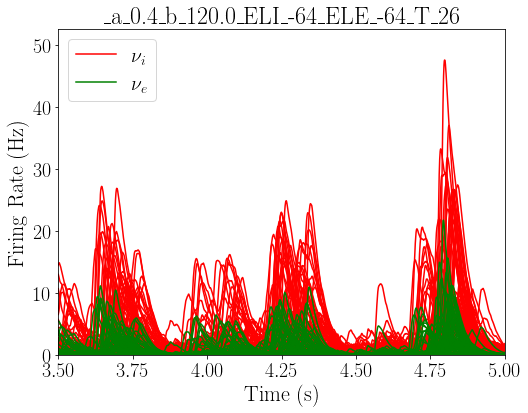

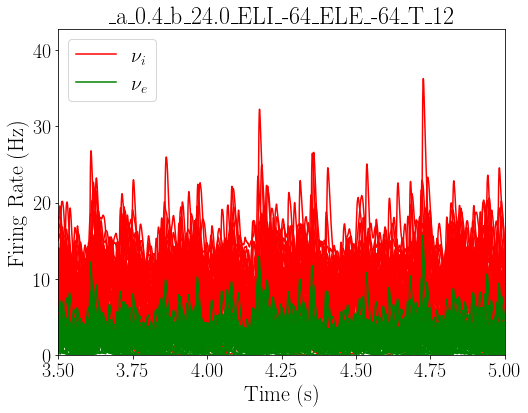

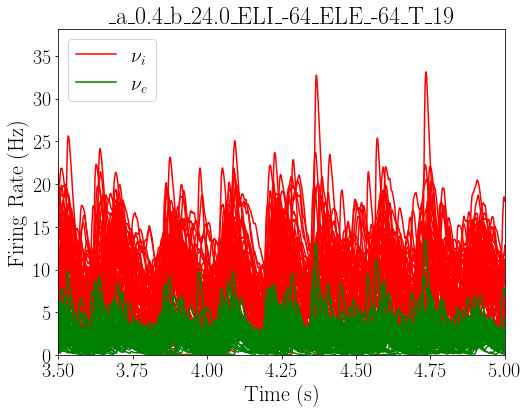

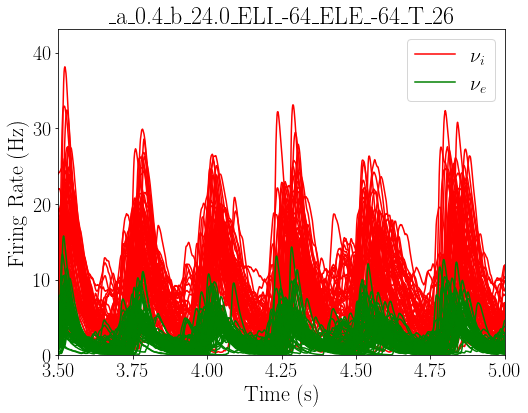

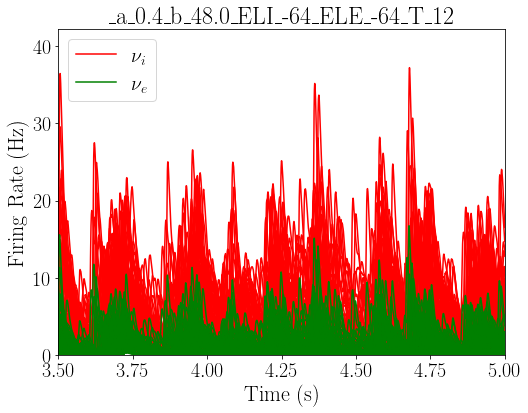

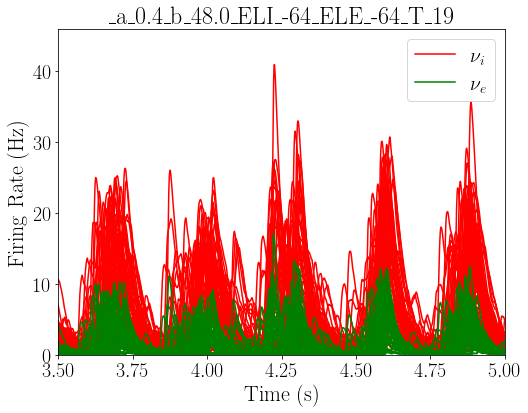

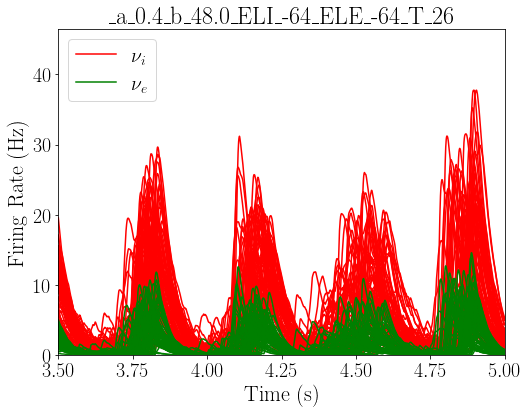

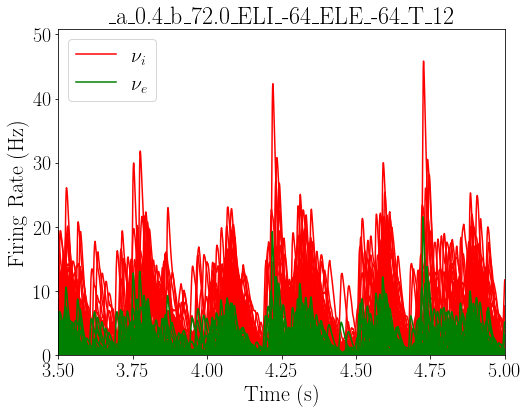

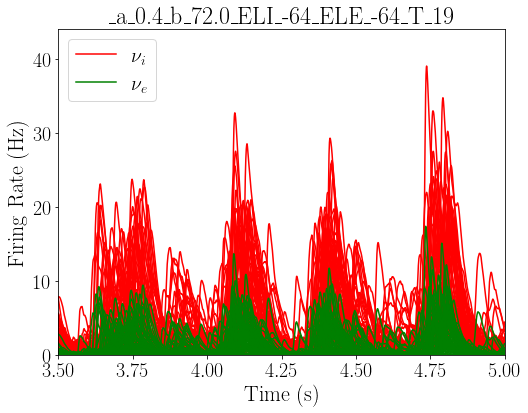

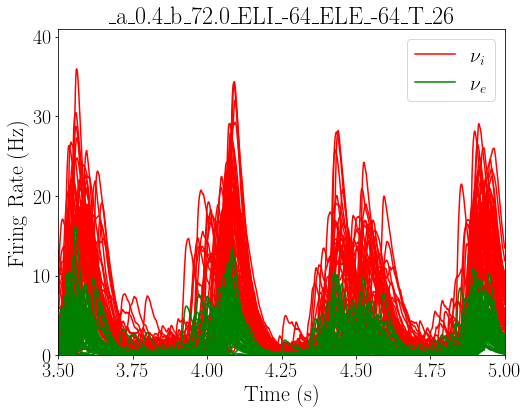

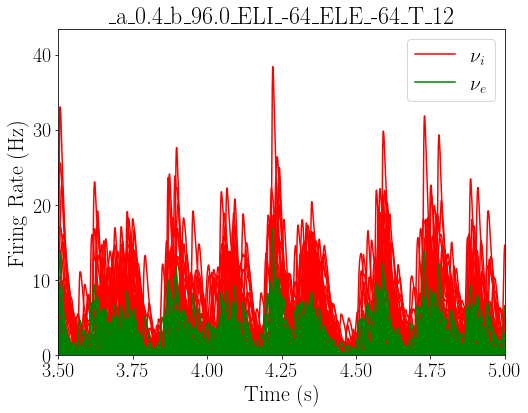

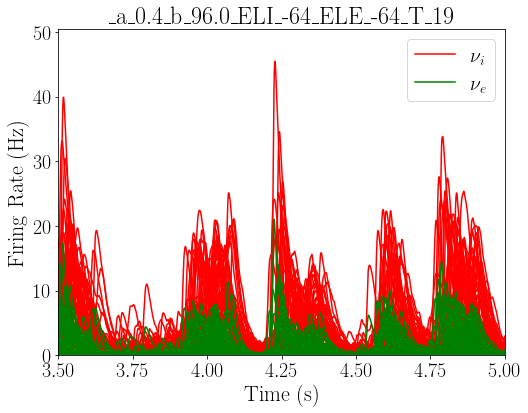

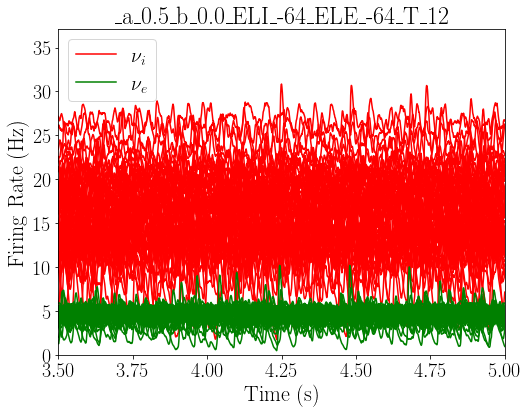

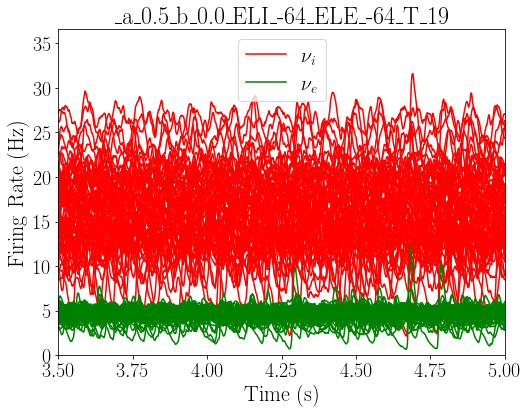

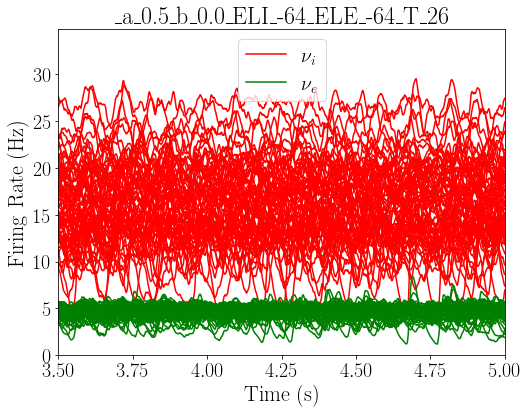

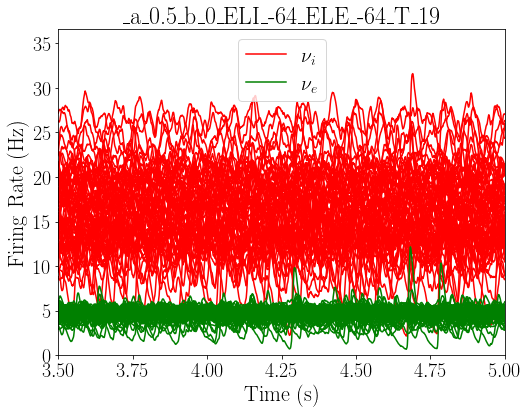

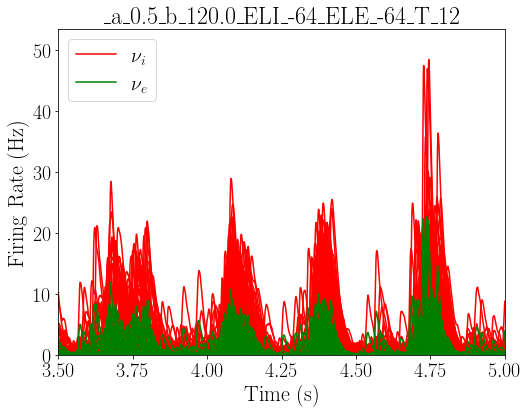

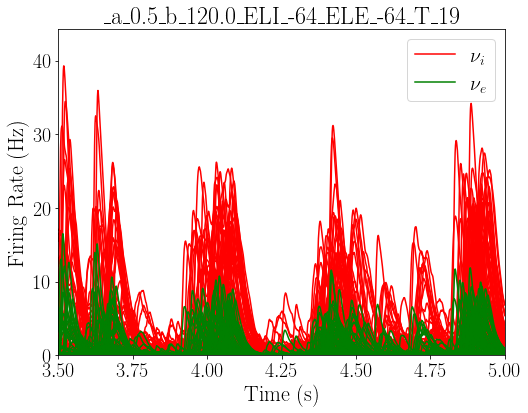

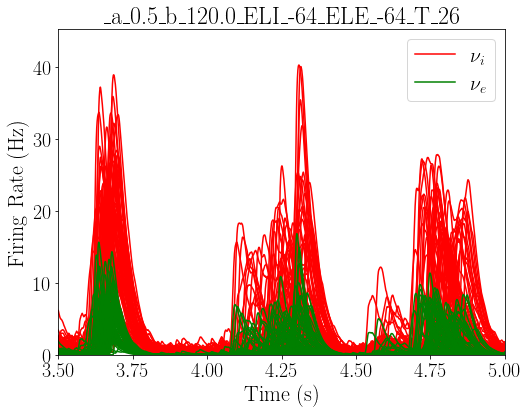

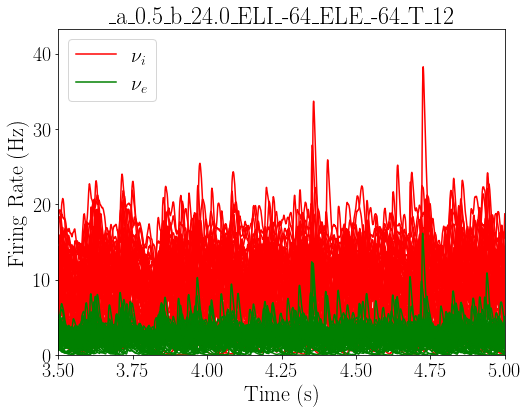

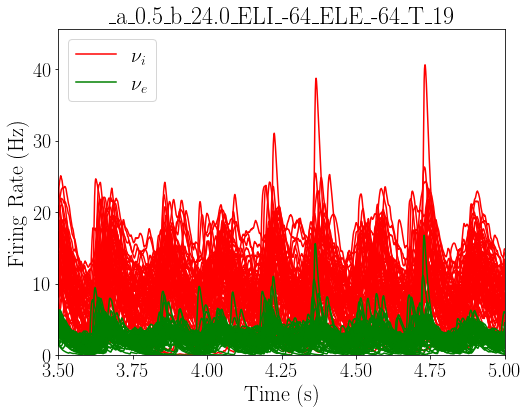

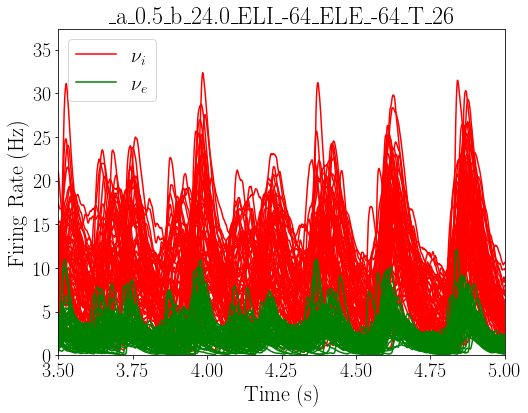

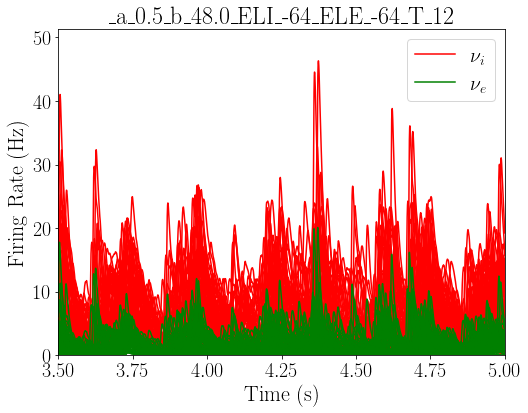

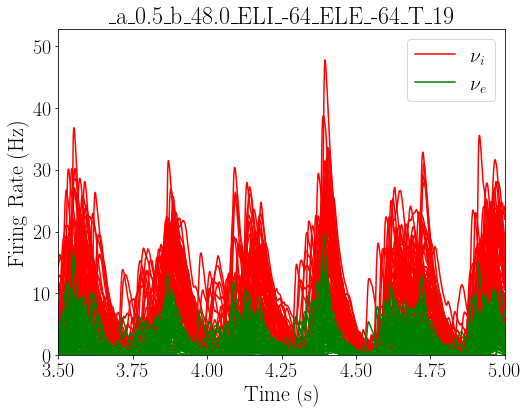

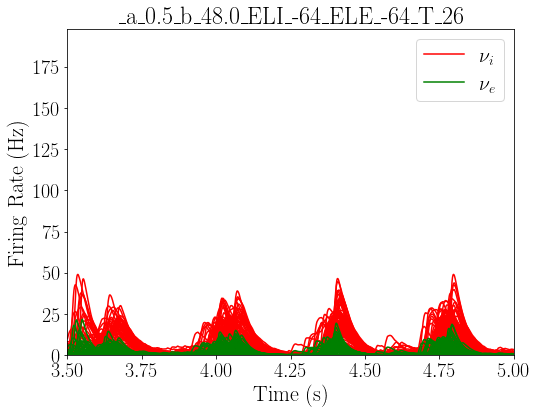

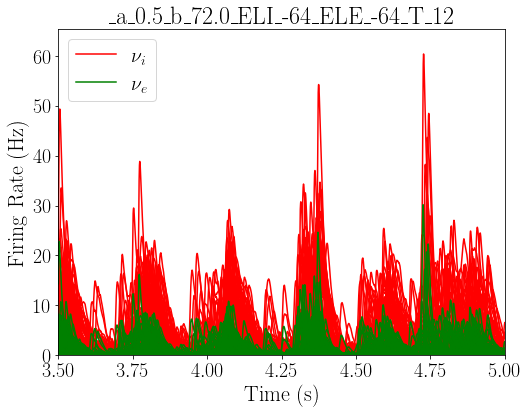

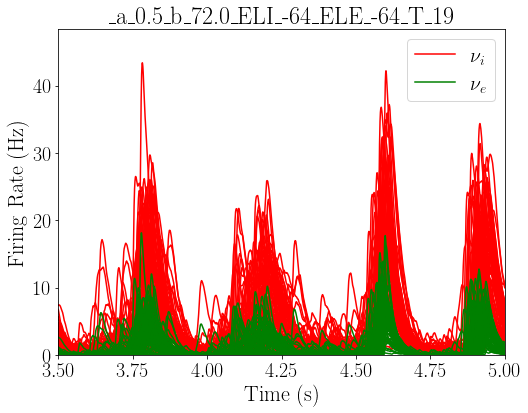

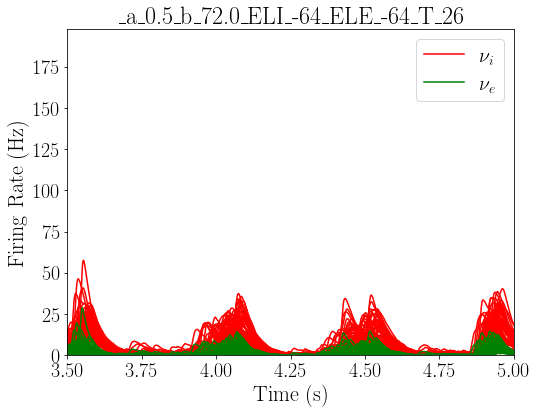

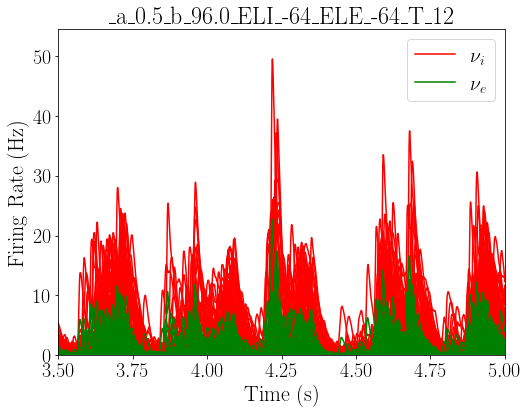

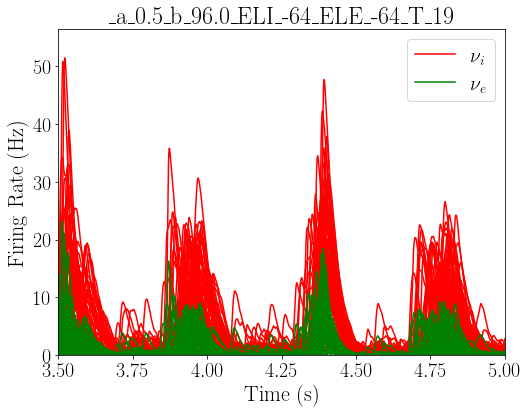

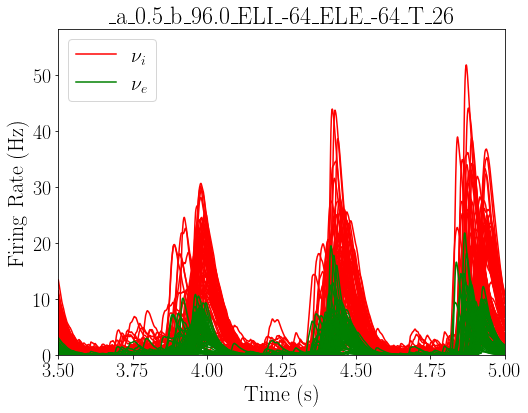

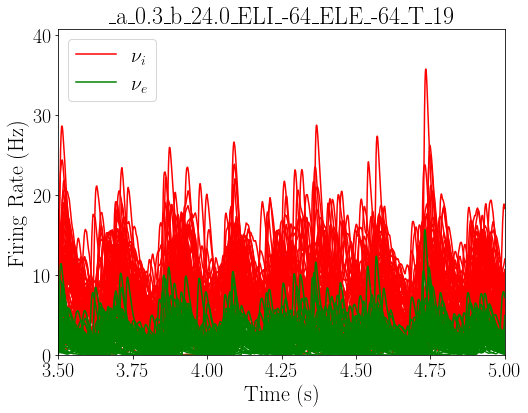

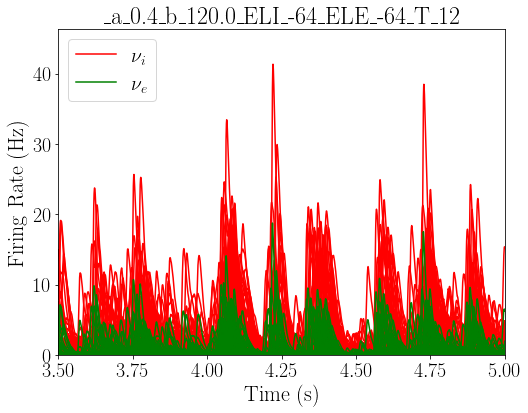

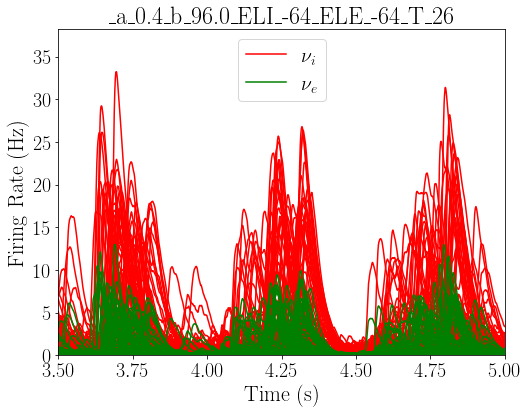

In [5]:
coeff_inh = 1
E_L_i = -64
E_L_e = -64
run_sim = 5000.0
cut_transient = 2000.0
ELS = f'ELI_{E_L_i}_ELE_{E_L_e}'
folder_results = f'/media/master/Nuevo vol/Internship/Data/hpc_tvbadex/results_for_plotting/coeff_inh{coeff_inh}/' \
+ ELS + '/'
folder_figures = '/home/master/Desktop/tests_hpc/figures/parameter_plotting/'
for file in os.scandir(folder_results):
    # Then the sweeps
    name = file.name
    result = tools.get_result(file.path, cut_transient, run_sim)
    time_s = result[0][0] * 1e-3  # from ms to sec

    # Decide which one to analyze since they usually exhibit very similar behavior
    FR_exc = result[0][1][:, 0, :] * 1e3  # from KHz to Hz; Excitatory firing rate
    FR_inh = result[0][1][:, 1, :] * 1e3  # from KHz to Hz; Inhibitory firing rate
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(time_s, FR_inh[:], c='r')
    ax.plot(time_s, FR_exc[:], c='g')
    ax.plot([], [], label='$\\nu_i$', c='r')
    ax.plot([], [], label='$\\nu_e$', c='g')
    ax.legend(loc='best')
    ax.set(title=name, xlabel='Time (s)', ylabel='Firing Rate (Hz)',
           xlim=(3.5, 5), ylim=(0, 5 + max([np.amax(FR_exc), np.amax(FR_inh)])))
    fig.savefig(folder_figures + name + '.png')
    plt.show()